Natalia Brzozowska
# Laboratorium 10
## Dyskretna Transformacja Fouriera

***
### Zadanie 1
   1. Zaimplementuj funkcję realizujacą DFT jako iloczyn macierzy Fouriera $F_{n}$ i n-elementowego wektora wejściowego ($y = F_{n}x$).
   
   2. Zaimplementuj również IDFT korzystając z tożsamości (tożsaomość). Sprawdź poprawność działania funkcji realizujacej DFT stosując transformacje odwrotną($x = F^{−1}_{n}y$) oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej.
   
   3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz $F_{n}$ dla danych o różnym rozmiarze.

***
### 1. DFT.
<p style='text-align: justify;'>
Poniżej zaimplementowałam funkcję _make_Fourier_matrix(n)_ , która tworzy macierz Fouriera, funkcję _w(n)_ , która zwraca odpowiednią wartość (prymitywny pierwiastek jedności) i funkcję _DFT(x)_ , która, korzystając z wcześniej opisanych funkcji, zwraca dyskretną transformatę Fouriera.<br><br>
Do funkcji _DFT(x)_ przekazywany jest wektor wejściowy x. W funkcji obliczany jest rozmiar tego wektora. Rozmiar wektora pownien być równy $2^{k}$, gdzie k jest liczbą naturalną. Jeśli tak jest to wywoływana jest funkcja _make_Fourier_matrix(n)_ i później zwracana jest odpowiednia wartość.<br><br>
Do funkcji _make_Fourier_matrix(n)_ jest przekazywany rozmiar wektora wejściowego. Na poczatku obliczana jest wartość $om$ równa $om=e^{(-2\pi i) /n}$, gdzie $i^{2} = -1$, korzystając z funkcji _w(n)_. Tworzona jest macierz o romiarze $nxn$, gdzie $n$ to rozmiar wektora wejściowego. Wartości elementów w macierzy Fouriera są równe $om^{jk}$, gdzie $j$ i $k$ to numery wiersza i kolumny macierzy.
</p>

In [177]:
import numpy as np
import cmath
import math

In [178]:
def w(n):
    return (np.e)**(-(2*np.pi*1j)/n)

def make_Fourier_matrix(n):
    om = w(n)
    F=np.zeros((n,n), dtype=complex)
    for i in range(n):
        for k in range(n):
            F[i][k]=om**(i*k)
    return F

def DFT(x):
    n = len(x)
    s = int(np.log2(n))
    if(2**s == n):
        F = make_Fourier_matrix(n)
        return F, F@x
    else:
        print("wrong array size")
    return 0,0

In [179]:
x=np.array([1,2-1j,-1j,-1+2j])

F, dft = DFT(x)

***
### 2. IDFT.
<p style='text-align: justify;'>
Poniżej zaimplementowałam funkcje potrzebne do obliczenie odwrotnej transformaty Fouriera. Funkcja _IDF(F,y)_ przjmuje macierz Fouriera obliczoną w poprzednio opisywanej funkjci oraz wektory wyjściowy y. Ta funkcja służy wyznaczeniu wektora wejściowego x. Do obliczenia wektora skorzystałam z zależności podanej w zadaniu dotyczacej macierzy sprzężonych $F_{n}^{-1}y = \frac{\overline{F_{n}\overline{y}}}{n}$. Macierz sprzężoną wyznaczam przy pomocy funkcji numpy.conjugate.
    </p>

In [180]:
def IDF(y,F):
    n = len(y)
    return np.conjugate(F@np.conjugate(y))/n

In [181]:
idf = IDF(dft,F)

Poniżej znajdują się porównania wyników działania zaimplementowanych funkcji z funkcją biblioteczną.

In [182]:
print("Porównanie implemetacji DFT z funkcją biblioteczną -",np.allclose(dft,np.fft.fft(x)))
print("Porównanie implemetacji IDFT z funkcją biblioteczną -", np.allclose(idf,np.fft.ifft(dft)))
print("Porównanie wektora x uzyskanego z funkcji IDFT (wej) z wektorem wejściowym (x)-", np.allclose(idf, x))

Porównanie implemetacji DFT z funkcją biblioteczną - True
Porównanie implemetacji IDFT z funkcją biblioteczną - True
Porównanie wektora x uzyskanego z funkcji IDFT (wej) z wektorem wejściowym (x)- True


***
### 3. Algorytm Cooleya-Turkeya.
<p style='text-align: justify;'>
Algorytm Cooleya-Turkeya jest jednym z algorytmów szybkiej transformacji Fouriera (FFT). Działa on szybciej niż zwykły algorytm DFT (taki jak zaimplementowany powyżej), ponieważ dzieli rekurencyjnie wektor wejściowy na mniejsze części, na których wykonuje DFT. Rozmiar wektora wejściowego musi być równy $2^{k}$, gdzie k jest liczbą naturalną. <br><br>
W zaimplementowanej poniżej funkcji _Cooley_Turkey_FFT(x)_ jeśli rozmiar tablicy wejściowej jest większy od 1, to ta tablica dzielona jest na dwie podtablice, z których jedna zawiera elementy o indeksach parzystych a druga elementy o indeksach nieparzystych. Następnie wywoływana jest ta funkcja rekurencyjnie dla otrzymanych podtablic i jeżeli rozmiar tablicy znów jest większy od 1 tablica jest dzielona na dwie. Jeśli rozmiar jest mniejszy lub równy 1, to wartość jest zwracana.<br><br>
Wtedy, gdy rekurencja dojdzie na najniższy poziom - zostanie jeden element w tabliach x1 i x2 - dla tych elementów zostanie wykonane DFT, z uwzględnieniem tego, że jest to tylko kawałek całego wektora wejściowego.<br>
Następnie podtablice są łączone i zwracane do wyższych poziomów rekurencji.
</p>

In [183]:
import time

In [184]:
def w2(n,k):
    return (np.e)**(-(2*np.pi*1j*k)/n)


def Cooley_Turkey_FFT(x):
    n = len(x)
    
    if n<=1:
        return [complex(x[0])]
    else:

        a0=np.array(x[0::2])
        a1=np.array(x[1::2])

        x1 = np.array(Cooley_Turkey_FFT(a0))
        x2 = np.array(Cooley_Turkey_FFT(a1))
        
        for k in range(0, int(n/2)):
            t = x1[k]
            p = w2(n,k) * x2[k]
            x1[k] = t + p
            x2[k] = t - p 


        result=np.zeros((n,), dtype=complex)

        for i in range(int(n/2)):
            result[i]=x1[i]
            result[i+int(n/2)]=x2[i]


        return result

def compare_time():
    N=128
    x_values = np.arange(0, N, 1)
    x = np.sin(x_values/5)
    x = np.array(x_values)
    
    start = time.time()
    x1 = np.fft.fft(x)
    end = time.time()
    t1 = end-start
    
    start2 = time.time()
    x2= Cooley_Turkey_FFT(x)
    end2 = time.time()
    t2 = end2 - start2
    
    start3 = time.time()
    _,x3 = DFT(x)
    end3 = time.time()
    t3 = end3 - start3
    
    print("Czas działania funkcji bibliotecznej:", t1)
    print("Czas działania algorytmu Cooleya-Turkeya:", t2)
    print("Czas działania funkcji DFT:", t3)
    print()
    print("Wynik funkcji bibliotecznej jest zgodny z wynikiem f. Cooley_Turkey_FFT -",np.allclose(x1,x2))
    print("Wynik funkcji bibliotecznej jest zgodny z wynikiem f. DFT -",np.allclose(x1,x3))

Szybkość działania funkcji porównuję korzystając z funkcji biblioteki time, dla przykładowego sinusoidalnego sygnału.

In [185]:
compare_time()

Czas działania funkcji bibliotecznej: 0.0
Czas działania algorytmu Cooleya-Turkeya: 0.002991199493408203
Czas działania funkcji DFT: 0.009004831314086914

Wynik funkcji bibliotecznej jest zgodny z wynikiem f. Cooley_Turkey_FFT - True
Wynik funkcji bibliotecznej jest zgodny z wynikiem f. DFT - True


***
### Wnioski
<p style='text-align: justify;'>
    Szybkość działania zaimplementowanego algorytmu realizującego FFT jest większa niż szybkość działania funkcji bibliotecznej. Wynika to zapewne z różnic w implementacji.<br>
    Szybkość zaimplementowanego algorytmu Cooleya-Turkeya jest jednak większa niż wcześniej zaimplementowanej funkcji DFT. Zgadza się to z przewidywaniami i wynika z faktu wykorzystania rekurencji w algorytmie Cooleya-Turkeya.<br><br>
Algorytm Cooleya-Turkeya ma mniejszą złożoność niż algorytm DFT ($nlogn$, podczas gdy DFT ma $n^{2}$. Algorytm realizujący FFT dzieli wejściową tablicę na mniejsze tablice, dla który oblicza dyskretną transformatę Fouriera. Dla transormaty wielkości $N=N_{1}N_{2}$ oblicza DFT $N_{1}$ oraz $N_{2}$ (wykorzystując n operacji), a następnie je łączy. To sprawia, że algorytm Cooleya-Turkeya działa szybciej niż "zwykłe" DFT.<br><br>
Przy pomocy algorytmów DFT i FFT (który jest właściwie usprawnionym DFT), można przedstawić sygnał w domenie częstotliwościowej.
</p>

***
### Zadanie 2.
I. Wygeneruj dwa sygnały czasowo-amplitudowe:
  1. Sygnał będacy suma pięciu sygnałów sinusoidalnych o różnych częstotliwościach
  2. Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie 1, ale ułożonych przedziałami, tzn. w każdym z pieciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości
  
II. Dokonaj transformacji sygnałów 1 i 2 do domeny częstotliwościowej, porównaj
otrzymane wyniki. Przedstaw na osobnych wykresach cześć rzeczywistą i cześć
urojoną wyniku transformacji.

***
### I.1
Wygenerowałam sygnał, na który składa się pięć sygnałów sinusoidalnych o różnych częstotliwościach, które zostały do siebie dodane. Poniżej znajduje się wykres przedstawiający wygenerowany sygnał.

In [186]:
import matplotlib.pylab as plt

In [187]:
N = 512
x = np.arange(0, N, 1)

y = np.sin(x/2)     
y += np.sin(x/5) 
y += np.sin(x/7) 
y += np.sin(x/11) 
y += np.sin(x/17) 

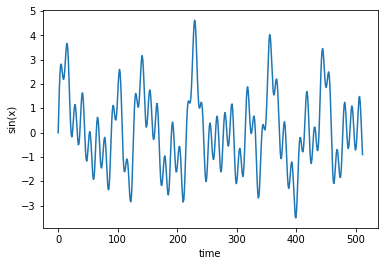

In [188]:
plt.plot(x,y)
plt.xlabel('time')
plt.ylabel('sin(x)')
plt.show()

### I.2
Wygenerowałam sygnał składający się z sygnałów o odpowiednich częstotliwościach (tych, które zostały użyte także w poprzednim sygnale), które zostały do siebie dołączone. Poniżej znajduje się wykres przedstawiający utworzony sygnał.

In [189]:
N = 102

x1 = np.arange(0, N, 1)
y1 = np.sin(x1/2)

x2 = np.arange(N, N*2, 1)
y2 = np.sin(x2/5) 

x3 = np.arange(N*2, N*3, 1)
y3 = np.sin(x3/7) 

x4 = np.arange(N*3, N*4, 1)
y4 = np.sin(x4/11) 

x5 = np.arange(N*4, N*5+2, 1)
y5 = np.sin(x5/17) 

xi = np.arange(0, N*5+2, 1)
yi = np.concatenate((y1,y2,y3,y4,y5), axis=None)

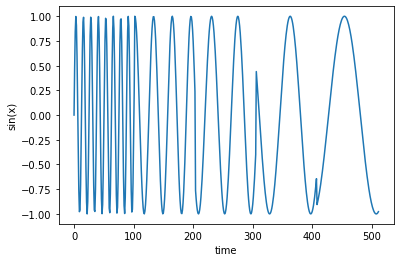

In [190]:
plt.plot(xi,yi)
plt.xlabel('time')
plt.ylabel('sin(x)')
plt.show()

### II
Przy pomocy wcześniej zaimplementowanych funkcji dokonałam transformacji utworzonych sygnałów do domeny częstotliwościowej. Wykorzystałam algorytm Cooleya-Turkeya.<br>
Następnie rozdzieliłam otrzymane wyniki na część rzeczywistą i urojoną, by później przedstawić je na wykresie.

Wyniki są zgodne z wynikami f. bibliotecznej - True


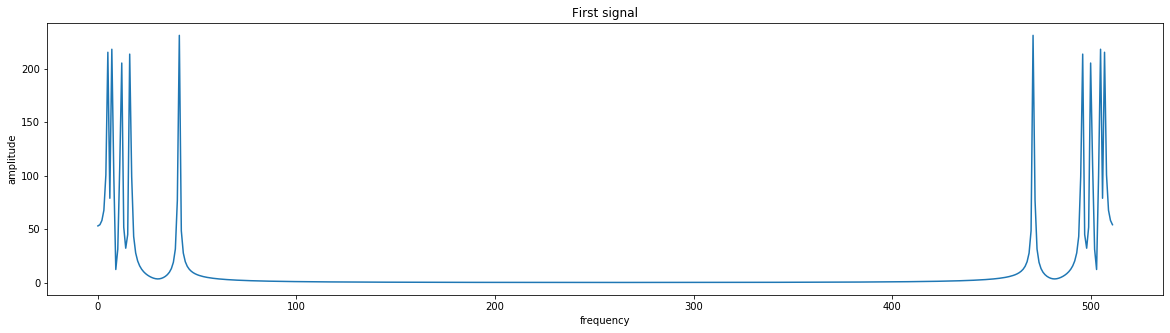

Wyniki są zgodne z wynikami f. bibliotecznej - True


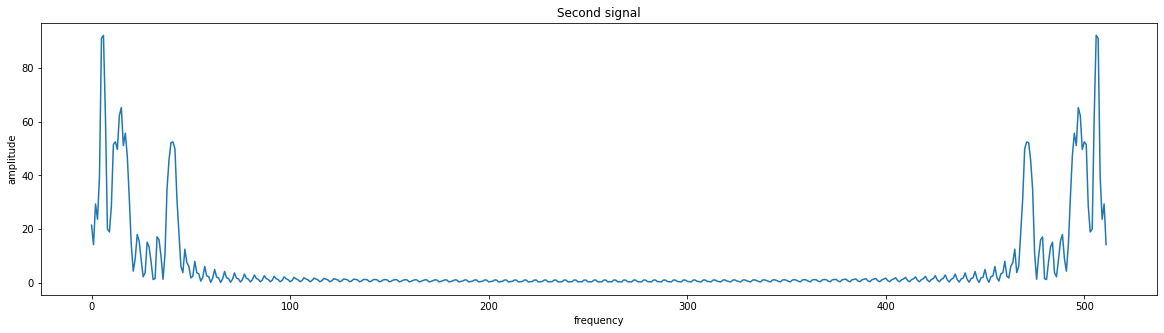

In [191]:
dftx1 = Cooley_Turkey_FFT(y)
x1 = np.fft.fft(y)
print("Wyniki są zgodne z wynikami f. bibliotecznej -",np.allclose(x1,dftx1))
dftx_r1 = [num.real for num in dftx1]
dftx_i1 = [num.imag for num in dftx1]


plt.figure(figsize=(20,5))
plt.plot(x,np.abs(dftx1))
plt.title('First signal' )
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()


dftx2 = Cooley_Turkey_FFT(yi)
x2 = np.fft.fft(yi)
print("Wyniki są zgodne z wynikami f. bibliotecznej -",np.allclose(x2,dftx2))
dftx_r2 = [num.real for num in dftx2]
dftx_i2 = [num.imag for num in dftx2]


plt.figure(figsize=(20,5))
plt.plot(xi,np.abs(dftx2))
plt.title('Second signal')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()


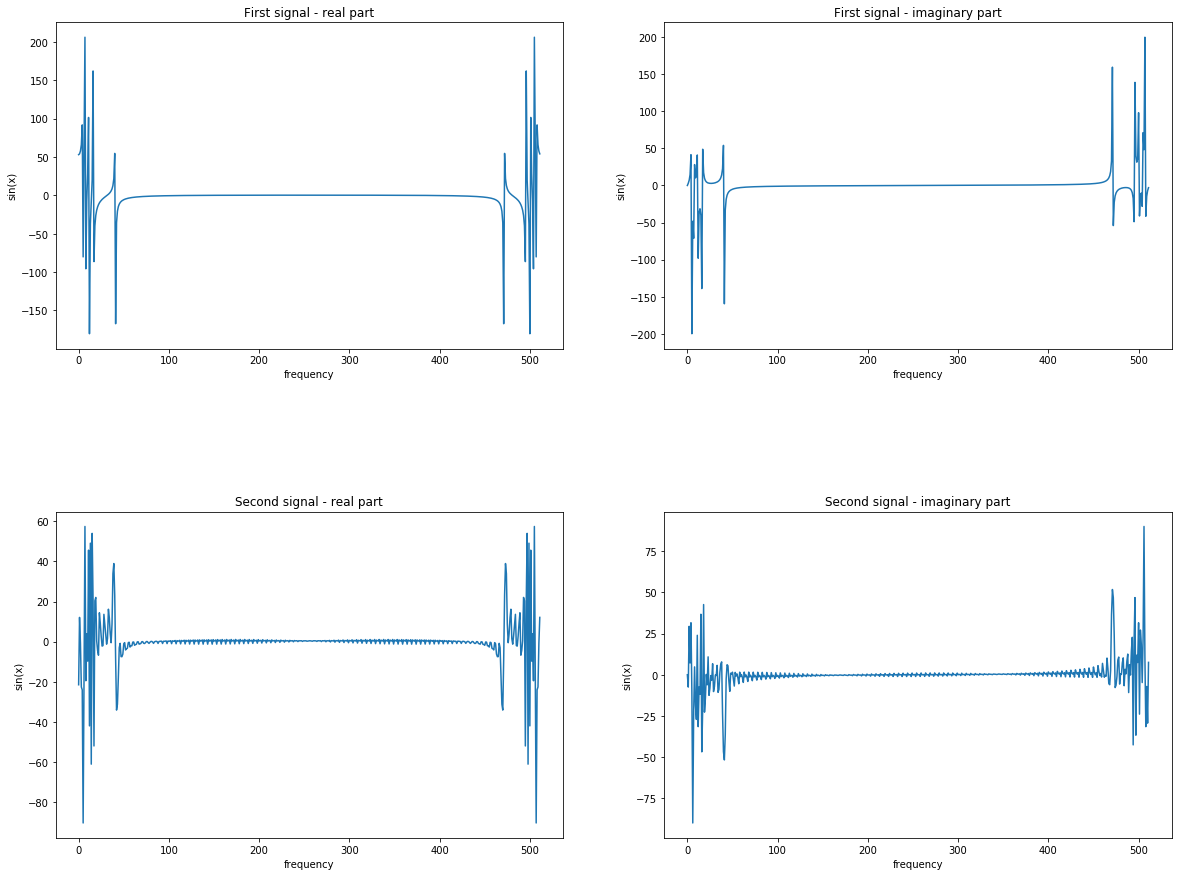

In [192]:
fig, axs = plt.subplots(2,2, figsize=(20,15))
fig.subplots_adjust(hspace=0.5)

axs[0,0].plot(x,dftx_r1)
axs[0,0].set_title("First signal - real part")
axs[0,0].set_xlabel('frequency')
axs[0,0].set_ylabel('sin(x)')

axs[0,1].plot(x,dftx_i1)
axs[0,1].set_title("First signal - imaginary part")
axs[0,1].set_xlabel('frequency')
axs[0,1].set_ylabel('sin(x)')

axs[1,0].plot(xi,dftx_r2)
axs[1,0].set_title("Second signal - real part")
axs[1,0].set_xlabel('frequency')
axs[1,0].set_ylabel('sin(x)')

axs[1,1].plot(xi,dftx_i2)
axs[1,1].set_title("Second signal - imaginary part")
axs[1,1].set_xlabel('frequency')
axs[1,1].set_ylabel('sin(x)')

plt.show()

### Porównanie wyników
<p style='text-align: justify;'>
    Na pierwszych dwóch wykresach przedstawiających częstotliwości w obu sygnałach można zauważyć, że w obu sygnałach występują podobne dominujące częstotliwości (piki na wykresach są w podobnych miejscach). Jednak dla pierwszego (sumowanego) sygnału piki te są wyższe niż dla drugiego sygnału. Myślę, że jest to spowodowane tym, że w drugim sygnale występują częstotliwości "pośrednie" - w prawie całej dziedzinie, amplituda fali o częstotliwości z tej dziedziny ma energię większą od zera. W pierwszym sygnale, amplitudy dla częstotliwości ze środka zakresu są bliskie zeru.<br>
    <p style='text-align: justify;'>
    W drugim sygnale, fale składowe z których składa się ten sygnał są "krótsze" niż w przypadku pierwszej fali - występują tylko we fragmencie dziedziny czasu, a nie w całej dziedzinie. Zatem w tym sygnale jest mniej fali o danej częstotliwości. To również może być powodem, przez który "słupki" częstotliwości w drugim sygnale są niższe niż w pierwszym. <br>
        Na wykres częstotliwości może mieć również wpływ sposób łączenia fal składowych w jeden sygnał.<br>
    <p style='text-align: justify;'>
Wykresy dla obu sygnałów w części rzeczywistej są podobne. Różnią się występowaniem "pośrednich" częstotliwości w drugim sygnale. "Pośrednie" częstotliwości występują także w części urojonej wyniku, które również są podobne do siebie.<br><br>
    Prosta przechodząca przez środek dziedziny częstotliwości mógłaby być osią symetrii części rzeczywistej wyników transformacji, jednak dla części urojonej taka zależność już nie zachodzi. W części urojonej wyniku jedna ze stron, odzielonych przez prostą przechodzącą przez środek osi x, jest przeciwn do drugiej. 
</p>

***
### Wnioski
<p style='text-align: justify;'>
Za pomocą FFT można zmienić domenę sygnału z zasowej na częstotliwościową. Aby zmienić domenę z powrotem należy wykorzystać _inverse Fourier transformation_. Dzięki transformacji Fouriera można zobaczyć z jakich częstotliwości składa się fala. 
<br>
Niezależnie od sposobu w jaki łączy się sygnały o danej częstotliwości w jednen sygnał, dominujące częstotliwości pozostają bardzo podobne. Jednak sposób połączenia sygnałów o odpowiednich częstotliwościach w jeden sygnał może powodować rozbieżności w odczytaniu częstotliwości fali. <br> 